In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

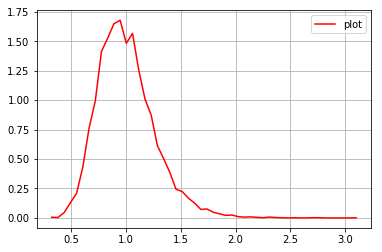

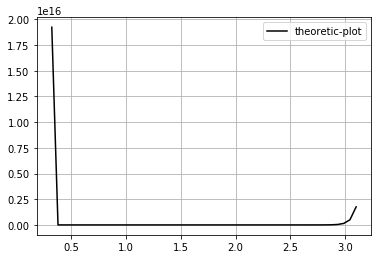

In [2]:
#parameters
meanN = 10
sdN = 1
sdQ = 1
sdP = 1
Er = 10
V = 1
e = 1

N = 10000

#Z=X/Y
Ndata = np.random.normal(meanN,sdN,N)
Qdata = np.random.normal(0,sdQ,N)
Pdata = np.random.normal(0,sdP,N)
Zdata = (e*Ndata+Qdata) / (Er+Pdata-(V/e)*Qdata)

density = True
bins = 50
hist, bin_edges = np.histogram(Zdata, bins, density=density)

##Definitions
def g(x):
    ans = 1/math.sqrt(math.pi)+x*np.exp(x**2)*math.erf(x)
    return ans
    
def A(x):
    ans = ((x**2)*(sdP**2)+(e**2)*(sdN**2)-(sdQ**2)*((V*e-x*sdP)**2))/(2*(e**2)*(sdP**2)*(sdN**2))
    return ans
    
def B(x):
    ans = ((sdQ**2)*(V*e-x*sdP)*(e*meanN*(sdP**2)-V*e*Er*(sdN**2))+e*meanN*x*(sdP**2)+Er*(e**2)*(sdN**2))/((e**2)*(sdP**2)*(sdN**2))
    return ans

C = ((sdQ**2)*((e*meanN*(sdP**2)-V*e*Er*(sdN**2))**2)-(e**2)*(meanN**2)*(sdP**2)-(e**2)*(Er**2)*(sdN**2))/(2*(e**2)*(sdN**2)*(sdP**2))    

k = 1/((2*math.pi)*math.sqrt((sdP**2)*(sdQ**2)+(V**2)*(sdQ**2)*(sdN**2)+(e**2)*(sdN**2)*(sdP**2)))

def f(x):
    ans = k*math.sqrt(math.pi)*(1/A(x))*np.exp(C)*g(B(x)/(2*math.sqrt(A(x))))
    return ans

flist = []

count = 0
while (count < bins):
    flist.append(f(bin_edges[count])) 
    count += 1

plt.figure()
plt.plot(bin_edges[0:-1], (hist), color="red", label = "plot")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(bin_edges[0:-1], flist , color="black", label = "theoretic-plot")
plt.grid()
plt.legend()
plt.show()